 Quinten Crum
 DSCI 320
 Fall 2021
 Final Project
 
# <center> Money </center>



### Issue

The stock market is a large and ever changing world. This is often very intimidating for those unfamiliar with all of its complexities. When I first got interested in stocks I was very intimidated by the whole system. I had no idea what to buy, when to buy it, or how much to buy of different stocks. Then I discovered these magical things called index funds. These are in essence a monetary representation of how a collection of companies performed. So I started looking into different index funds and it turns out there is a very large number of these too. This is where I thought of the issue. Which index fund should I put my money in at any given week to maximize my return on investment?

### Set up
For this project I have selected 4 different index funds. The goal is to find out which index fund we can to put our imaginary salary of $100 per week every week for an entire year in order to maximize our profit. In order to determine the objective function for this we will be using data ranging from 11/16/2011 to 11/17/2021 for each of these index funds.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from tabulate import tabulate
from numpy import random
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator , FormatStrFormatter
from numpy.linalg import inv
from pulp import *

In [22]:
# Reading in index Data
original_sp_500_data = pd.read_csv("SP500 (2).csv",index_col='DATE') #S&P 500
original_dowJones_data = pd.read_csv("DJIA.csv",index_col='DATE') #Dow Jones Industrial Average
original_willShire_fullMarket_data = pd.read_csv("WILL5000INDFC.csv",index_col='DATE') #Wilshire 5000 Total Market Full Cap Index
original_nasdaqcom_data = pd.read_csv("NASDAQCOM.csv",index_col='DATE') #NASDAQ Composite Index

In [23]:
# Converting to numpy array
sp_500_data = original_sp_500_data.to_numpy()
dowJones_data = original_dowJones_data.to_numpy()
willShire_fullMarket_data = original_willShire_fullMarket_data.to_numpy()
nasdaqcom_data = original_nasdaqcom_data.to_numpy()


In [24]:
# Creates the average value in place of '.'
def periodsBeGone(t,i,dist):
    nums = [-1,-1]
    if(t=='sp_500_data'):
        if(sp_500_data[i-dist][0] == '.'):
            nums[0] = periodsBeGone(t,i,dist+1)[0]
        else:
            nums[0] = sp_500_data[i-dist].astype('float64')[0]
            
        if(sp_500_data[i+dist][0] == '.'):
            nums[1] = periodsBeGone(t,i,dist+1)[0]
        else:
            nums[1] = sp_500_data[i+dist].astype('float64')[0]
            
    if(t=='dowJones_data'):
        if(dowJones_data[i-dist][0] == '.'):
            nums[0] = periodsBeGone(t,i,dist+1)[0]
        else:
            nums[0] = dowJones_data[i-dist].astype('float64')[0]
            
        if(dowJones_data[i+dist][0] == '.'):
            nums[1] = periodsBeGone(t,i,dist+1)[0]
        else:
            nums[1] = dowJones_data[i+dist].astype('float64')[0]
        
    if(t=='willShire_fullMarket_data'):
        if(willShire_fullMarket_data[i-dist][0] == '.'):
            nums[0] = periodsBeGone(t,i,dist+1)[0]
        else:
            nums[0] = willShire_fullMarket_data[i-dist].astype('float64')[0]
            
        if(willShire_fullMarket_data[i+dist][0] == '.'):
            nums[1] = periodsBeGone(t,i,dist+1)[0]
        else:
            nums[1] = willShire_fullMarket_data[i+dist].astype('float64')[0]
        
    if(t=='nasdaqcom_data'):
        if(nasdaqcom_data[i-dist][0] == '.'):
            nums[0] = periodsBeGone(t,i,dist+1)[0]
        else:
            nums[0] = nasdaqcom_data[i-dist].astype('float64')[0]
            
        if(nasdaqcom_data[i+dist][0] == '.'):
            nums[1] = periodsBeGone(t,i,dist+1)[0]
        else:
            nums[1] = nasdaqcom_data[i+dist].astype('float64')[0]
    return nums

In [25]:
# Converts the values into floating point numbers from strings
for i in range(0,nasdaqcom_data.shape[0]):
    #S&P 500
    if(sp_500_data[i][0] == '.'):
        sp_500_data[i][0] = sum(periodsBeGone('sp_500_data',i,1))/2
        
    else:
        sp_500_data[i][0] = sp_500_data[i].astype('float64')[0]
        
    #Dow Jones Industrial Average
    if(dowJones_data[i][0] == '.'):
        dowJones_data[i][0] = sum(periodsBeGone('dowJones_data',i,1))/2
    else:
        dowJones_data[i][0] = dowJones_data[i].astype('float64')[0]
        
    #Wilshire 5000 Total Market Full Cap Index
    if(willShire_fullMarket_data[i][0] == '.'):
        willShire_fullMarket_data[i][0] = sum(periodsBeGone('willShire_fullMarket_data',i,1))/2
    else:
        willShire_fullMarket_data[i][0] = willShire_fullMarket_data[i].astype('float64')[0]
        
    #NASDAQ Composite Index
    if(nasdaqcom_data[i][0] == '.'):
        nasdaqcom_data[i][0] = sum(periodsBeGone('nasdaqcom_data',i,1))/2
    else:
        nasdaqcom_data[i][0] = nasdaqcom_data[i].astype('float64')[0]
  

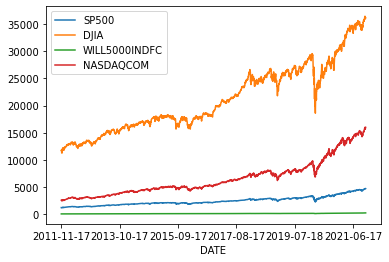

In [26]:
combined_info = pd.concat([original_sp_500_data,original_dowJones_data,original_willShire_fullMarket_data,original_nasdaqcom_data],axis=1)
combined_info.plot();
plt.savefig('full_data_full_range.png');

### Goal

max( profit )

profit = revenue - cost

profit = total money at the end of the year - total money invested

However, for this situation the total money invested will be a constant so it doesn't depend on x and therefore we don't need it when formulating our equation.

### "New" goal

max( revenue ) or min( - revenue )

revenue = final price of shares * number of shares - purchasing price * number of shares

revenue = (final price of shares - purchasing price) * number of shares




### Objective function

min - $\sum\limits_{t=0}^{250}$ ($p_{t} - a_{t})*x_{t}$ 

* x is the number of shares purchased of a given index fund and at a given measurement time
* p is the final amount that a given index fund has reached per share
* a is the purchasing price of a given index fund and at a given measurement time

x = ($x_{1}^{sp500},x_{2}^{sp500},...,x_{250}^{sp500},x_{1}^{dow},...,x_{250}^{dow},x_{1}^{will},...,x_{250}^{will},x_{1}^{nasdaq},...,x_{250}^{nasdaq})$

p = (final price of S&P 500,...,final price of DowJones,...,final price of WillShire,...,final price of NASDAQ,...)

a = (price of S&P 500 at period 1,...,price of S&P 500 at period 250,price of DowJones at period 1,...,price of DowJones at period 250,price of WillShire at period 1,...,price of WillShire at period 250,price of NASDAQ at period 1,...,price of NASDAQ at period 250)

Subject to:

$x_{t}$ $\geq$ 0
* Cannot purchase negative shares


for all i

$x_{i}^{sp500}*a_{t} + x_{i}^{dow}*a_{t} + x_{i}^{will}*a_{t} + x_{i}^{nasdaq}*a_{t}$ $\leq$ 100
* Cannot purchase more shares than what you can afford
* Every measurement period you are given $100 for investing



In [27]:
# Figuring out the number of entries for each year
entries = np.array([[original_sp_500_data['2011-11-17':'2011-12-31']['SP500'].shape[0],
                      original_sp_500_data['2012-01-01':'2012-12-31']['SP500'].shape[0],
                     original_sp_500_data['2013-01-01':'2013-12-31']['SP500'].shape[0],
                     original_sp_500_data['2014-01-01':'2014-12-31']['SP500'].shape[0],
                     original_sp_500_data['2015-01-01':'2015-12-31']['SP500'].shape[0],
                     original_sp_500_data['2016-01-01':'2016-12-31']['SP500'].shape[0],
                     original_sp_500_data['2017-01-01':'2017-12-31']['SP500'].shape[0],
                     original_sp_500_data['2018-01-01':'2018-12-31']['SP500'].shape[0],
                     original_sp_500_data['2019-01-01':'2019-12-31']['SP500'].shape[0],
                     original_sp_500_data['2020-01-01':'2020-12-31']['SP500'].shape[0],
                     original_sp_500_data['2021-01-01':'2021-11-16']['SP500'].shape[0]],
                     
                     [original_dowJones_data['2011-11-17':'2011-12-31']['DJIA'].shape[0],
                      original_dowJones_data['2012-01-01':'2012-12-31']['DJIA'].shape[0],
                     original_dowJones_data['2013-01-01':'2013-12-31']['DJIA'].shape[0],
                     original_dowJones_data['2014-01-01':'2014-12-31']['DJIA'].shape[0],
                     original_dowJones_data['2015-01-01':'2015-12-31']['DJIA'].shape[0],
                     original_dowJones_data['2016-01-01':'2016-12-31']['DJIA'].shape[0],
                     original_dowJones_data['2017-01-01':'2017-12-31']['DJIA'].shape[0],
                     original_dowJones_data['2018-01-01':'2018-12-31']['DJIA'].shape[0],
                     original_dowJones_data['2019-01-01':'2019-12-31']['DJIA'].shape[0],
                     original_dowJones_data['2020-01-01':'2020-12-31']['DJIA'].shape[0],
                     original_dowJones_data['2021-01-01':'2021-11-16']['DJIA'].shape[0]],
                     
                     [original_willShire_fullMarket_data['2011-11-17':'2011-12-31']['WILL5000INDFC'].shape[0],
                      original_willShire_fullMarket_data['2012-01-01':'2012-12-31']['WILL5000INDFC'].shape[0],
                      original_willShire_fullMarket_data['2013-01-01':'2013-12-31']['WILL5000INDFC'].shape[0],
                      original_willShire_fullMarket_data['2014-01-01':'2014-12-31']['WILL5000INDFC'].shape[0],
                      original_willShire_fullMarket_data['2015-01-01':'2015-12-31']['WILL5000INDFC'].shape[0],
                      original_willShire_fullMarket_data['2016-01-01':'2016-12-31']['WILL5000INDFC'].shape[0],
                      original_willShire_fullMarket_data['2017-01-01':'2017-12-31']['WILL5000INDFC'].shape[0],
                      original_willShire_fullMarket_data['2018-01-01':'2018-12-31']['WILL5000INDFC'].shape[0],
                      original_willShire_fullMarket_data['2019-01-01':'2019-12-31']['WILL5000INDFC'].shape[0],
                      original_willShire_fullMarket_data['2020-01-01':'2020-12-31']['WILL5000INDFC'].shape[0],
                     original_willShire_fullMarket_data['2021-01-01':'2021-11-16']['WILL5000INDFC'].shape[0]],
                     
                     [original_nasdaqcom_data['2011-11-17':'2011-12-31']['NASDAQCOM'].shape[0],
                      original_nasdaqcom_data['2012-01-01':'2012-12-31']['NASDAQCOM'].shape[0],
                      original_nasdaqcom_data['2013-01-01':'2013-12-31']['NASDAQCOM'].shape[0],
                      original_nasdaqcom_data['2014-01-01':'2014-12-31']['NASDAQCOM'].shape[0],
                      original_nasdaqcom_data['2015-01-01':'2015-12-31']['NASDAQCOM'].shape[0],
                      original_nasdaqcom_data['2016-01-01':'2016-12-31']['NASDAQCOM'].shape[0],
                      original_nasdaqcom_data['2017-01-01':'2017-12-31']['NASDAQCOM'].shape[0],
                      original_nasdaqcom_data['2018-01-01':'2018-12-31']['NASDAQCOM'].shape[0],
                      original_nasdaqcom_data['2019-01-01':'2019-12-31']['NASDAQCOM'].shape[0],
                      original_nasdaqcom_data['2020-01-01':'2020-12-31']['NASDAQCOM'].shape[0],
                      original_nasdaqcom_data['2021-01-01':'2021-11-16']['NASDAQCOM'].shape[0]]])
                     
entries

array([[ 32, 261, 261, 261, 261, 261, 260, 261, 261, 262, 228],
       [ 32, 261, 261, 261, 261, 261, 260, 261, 261, 262, 228],
       [ 32, 261, 261, 261, 261, 261, 260, 261, 261, 262, 228],
       [ 32, 261, 261, 261, 261, 261, 260, 261, 261, 262, 228]])

In [28]:
# Creating averages for the index funds
avg_sp_500 = np.zeros(max(entries[0]))
avg_dowJones = np.zeros(max(entries[0]))
avg_willShire = np.zeros(max(entries[0]))
avg_nasdaq = np.zeros(max(entries[0]))

# Summation
for i in range(0,entries.shape[1]):# year iteration
    for j in range(0,entries[0][i]):#number of entries
        #Speical case for 2011
        if(i==0):
            ind = max(entries[0])-1-entries[0][0]
            
            avg_sp_500[ind + j] = avg_sp_500[ind + j] + sp_500_data[ind + j][0]
            avg_dowJones[ind + j] = avg_dowJones[ind + j] + dowJones_data[ind + j][0]
            avg_willShire[ind + j] = avg_willShire[ind + j] + willShire_fullMarket_data[ind + j][0]
            avg_nasdaq[ind + j] = avg_nasdaq[ind + j] + nasdaqcom_data[ind + j][0]
        else:
            avg_sp_500[j] = avg_sp_500[j] + sp_500_data[j][0]
            avg_dowJones[j] = avg_dowJones[j] + dowJones_data[j][0]
            avg_willShire[j] = avg_willShire[j] + willShire_fullMarket_data[j][0]
            avg_nasdaq[j] = avg_nasdaq[j] + nasdaqcom_data[j][0]

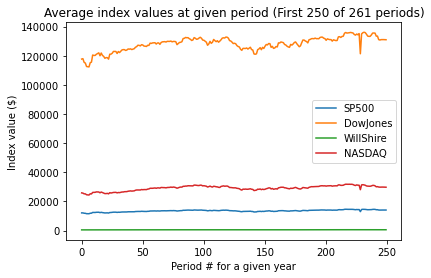

In [29]:
plt.figure;
plt.plot(avg_sp_500[:250],label='SP500');
plt.plot(avg_dowJones[:250],label='DowJones');
plt.plot(avg_willShire[:250],label='WillShire');
plt.plot(avg_nasdaq[:250],label='NASDAQ');
plt.title('Average index values at given period (First 250 of 261 periods)');
plt.xlabel('Period # for a given year');
plt.ylabel('Index value ($)');
plt.legend();
plt.savefig('average_vals.png')

In [30]:
# Creating the Model1 (the average model)
model1 = LpProblem('Average',LpMinimize)
temp = ['SP500','Dow','Will','NASDAQ']
var_names = [temp[j]+'_'+str(i) for j in range(0, 4) for i in range(1, 251)]

# X variable names
x_variables = LpVariable.matrix("X",var_names,lowBound=0) # Purposly left the variables continuous

# p_t
pt = [avg_sp_500[249]]*250 + [avg_dowJones[249]]*250 + [avg_willShire[249]]*250 + [avg_nasdaq[249]]*250

#a_t
at = [0]*len(x_variables)
for i in range(0,250):
    at[i] = avg_sp_500[i]
    at[i+250] = avg_dowJones[i]
    at[i+500] = avg_willShire[i]
    at[i+750] = avg_nasdaq[i]
    
# Already do the math pt-at
pt_at = np.zeros(len(at))
for i in range(0,len(at)):
    pt_at[i] = (pt[i] - at[i])*-1


In [31]:
# Adding the objective function to our model
obj_func = lpSum(x_variables*pt_at)

model1 += obj_func

In [32]:
# Creating the constraints
money = 100

for i in range(0,250):
    model1 += x_variables[i]*at[i] + x_variables[i+250]*at[i+250] + x_variables[i+500]*at[i+500] + x_variables[i+750]*at[i+750]<= money , "Cash Constraints " + str(i)
    

In [33]:
# Solving model
model1.solve()
LpStatus[model1.status]

'Optimal'

This function solves the for the minimum using branch and cut method:
https://en.wikipedia.org/wiki/Branch_and_cut

This method is for integer linear programming and because this is obviously not an integer it uses the simplex method that we discussed about in class.

In [34]:
# -Revenue at minimum
model1.objective.value()

-1401.2327353792552

In [35]:
# Final values
optimal_vals = np.array([[0,0.0,'','']]*len(at))
count = 0
for v in model1.variables():
    if(v.value()>0):
        #print(v.name,"=", v.value())
        count +=1
        if(v.name[-4]=='_'):
            optimal_vals[count-1][0]=v.name[-3:]
        if(v.name[-3]=='_'):
            optimal_vals[count-1][0]=v.name[-2:]
        if(v.name[-2]=='_'):
            optimal_vals[count-1][0]=v.name[-1:]
            
        optimal_vals[count-1][1]=v.value()
        optimal_vals[count-1][2]=v.name
        
        if('SP500' in v.name):
            optimal_vals[count-1][3] = 'blue'
        if('Dow' in v.name):
            optimal_vals[count-1][3] = 'green'
        if('Will' in v.name):
            optimal_vals[count-1][3] = 'red'
        if('NASDAQ' in v.name):
            optimal_vals[count-1][3] = 'purple'
        
    if(v.value()<0):
        print('Problem')
        break
count

217

In [36]:
optimal_vals = optimal_vals[0:count]
print("By column: Period #, # of shares to purchase, which index fund, color on graph")
optimal_vals

By column: Period #, # of shares to purchase, which index fund, color on graph


array([['25', '0.0038790211', 'X_NASDAQ_25', 'purple'],
       ['26', '0.0038469676', 'X_NASDAQ_26', 'purple'],
       ['27', '0.0038187762', 'X_NASDAQ_27', 'purple'],
       ['28', '0.0038139989', 'X_NASDAQ_28', 'purple'],
       ['29', '0.0038092336', 'X_NASDAQ_29', 'purple'],
       ['30', '0.0038610337', 'X_NASDAQ_30', 'purple'],
       ['31', '0.0038259352', 'X_NASDAQ_31', 'purple'],
       ['32', '0.0038385506', 'X_NASDAQ_32', 'purple'],
       ['33', '0.0038067177', 'X_NASDAQ_33', 'purple'],
       ['34', '0.0037754085', 'X_NASDAQ_34', 'purple'],
       ['35', '0.0037759217', 'X_NASDAQ_35', 'purple'],
       ['1', '0.19849146', 'X_Will_1', 'red'],
       ['10', '0.19364833', 'X_Will_10', 'red'],
       ['100', '0.17146776', 'X_Will_100', 'red'],
       ['101', '0.17152659', 'X_Will_101', 'red'],
       ['102', '0.17254767', 'X_Will_102', 'red'],
       ['103', '0.17358098', 'X_Will_103', 'red'],
       ['104', '0.17686594', 'X_Will_104', 'red'],
       ['105', '0.17534631', 'X_W

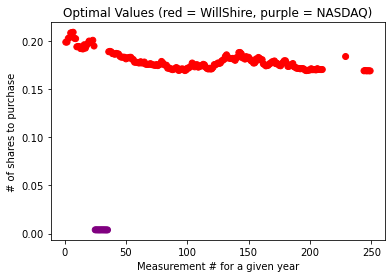

In [37]:
plt.scatter(optimal_vals[:,0].astype('float64'),optimal_vals[:,1].astype('float64'),c=optimal_vals[:,3]);
plt.title('Optimal Values (red = WillShire, purple = NASDAQ)');
plt.xlabel('Measurement # for a given year');
plt.ylabel('# of shares to purchase');
plt.savefig('full_results1.png');

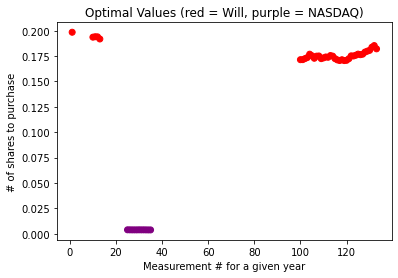

In [38]:
plt.scatter(optimal_vals[:50,0].astype('float64'),optimal_vals[:50,1].astype('float64'),c=optimal_vals[:50,3]);
plt.title('Optimal Values (red = Will, purple = NASDAQ)');
plt.xlabel('Measurement # for a given year');
plt.ylabel('# of shares to purchase');
plt.savefig('part_results1.png');

Now instead of using the average of all the years lets us the average of 2019-2021.








In [94]:
# Creating averages for the index funds
avg_sp_500 = np.zeros(max(entries[0]))
avg_dowJones = np.zeros(max(entries[0]))
avg_willShire = np.zeros(max(entries[0]))
avg_nasdaq = np.zeros(max(entries[0]))

# Summation
for i in range(8,entries.shape[1]-1):# year iteration
    for j in range(0,entries[0][i]):#number of entries
        avg_sp_500[j] = avg_sp_500[j] + sp_500_data[j][0]
        avg_dowJones[j] = avg_dowJones[j] + dowJones_data[j][0]
        avg_willShire[j] = avg_willShire[j] + willShire_fullMarket_data[j][0]
        avg_nasdaq[j] = avg_nasdaq[j] + nasdaqcom_data[j][0]

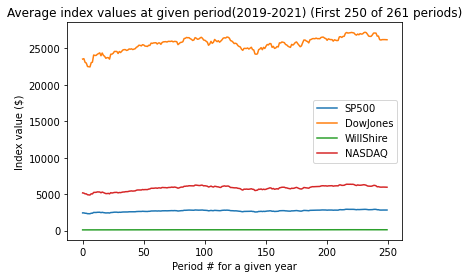

In [95]:
plt.figure;
plt.plot(avg_sp_500[:250],label='SP500');
plt.plot(avg_dowJones[:250],label='DowJones');
plt.plot(avg_willShire[:250],label='WillShire');
plt.plot(avg_nasdaq[:250],label='NASDAQ');
plt.title('Average index values at given period(2019-2021) (First 250 of 261 periods)');
plt.xlabel('Period # for a given year');
plt.ylabel('Index value ($)');
plt.legend();
plt.savefig('average_vals_2019_2020.png')

In [96]:
# Creating the Model2 (the average model for 2019-2020)
model2 = LpProblem('Average_2019_2020',LpMinimize)
temp = ['SP500','Dow','Will','NASDAQ']
var_names = [temp[j]+'_'+str(i) for j in range(0, 4) for i in range(1, 251)]

# X variable names
x_variables = LpVariable.matrix("X",var_names,lowBound=0) # Purposly left the variables continuous

# p_t
pt = [avg_sp_500[249]]*250 + [avg_dowJones[249]]*250 + [avg_willShire[249]]*250 + [avg_nasdaq[249]]*250

#a_t
at = [0]*len(x_variables)
for i in range(0,250):
    at[i] = avg_sp_500[i]
    at[i+250] = avg_dowJones[i]
    at[i+500] = avg_willShire[i]
    at[i+750] = avg_nasdaq[i]
    
# Already do the math pt-at
pt_at = np.zeros(len(at))
for i in range(0,len(at)):
    pt_at[i] = (pt[i] - at[i])*-1

    
# Adding the objective function to our model
obj_func = lpSum(x_variables*pt_at)

model2 += obj_func


# Creating the constraints
money = 100

for i in range(0,250):
    model2 += x_variables[i]*at[i] + x_variables[i+250]*at[i+250] + x_variables[i+500]*at[i+500] + x_variables[i+750]*at[i+750]<= money , "Cash Constraints " + str(i)
    

# Solving model
model2.solve()
LpStatus[model2.status]

'Optimal'

In [97]:
# -Revenue at minimum
model2.objective.value()

-1392.3614715776082

In [98]:
# Final values
optimal_vals2 = np.array([[0,0.0,'','']]*len(at))
count = 0
for v in model2.variables():
    if(v.value()>0):
        #print(v.name,"=", v.value())
        count +=1
        if(v.name[-4]=='_'):
            optimal_vals2[count-1][0]=v.name[-3:]
        if(v.name[-3]=='_'):
            optimal_vals2[count-1][0]=v.name[-2:]
        if(v.name[-2]=='_'):
            optimal_vals2[count-1][0]=v.name[-1:]
            
        optimal_vals2[count-1][1]=v.value()
        optimal_vals2[count-1][2]=v.name
        
        if('SP500' in v.name):
            optimal_vals2[count-1][3] = 'blue'
        if('Dow' in v.name):
            optimal_vals2[count-1][3] = 'green'
        if('Will' in v.name):
            optimal_vals2[count-1][3] = 'red'
        if('NASDAQ' in v.name):
            optimal_vals2[count-1][3] = 'purple'
        
    if(v.value()<0):
        print('Problem')
        break
count

216

In [99]:
optimal_vals2 = optimal_vals2[0:count]
print("By column: Period #, # of shares to purchase, which index fund, color on graph")
optimal_vals2

By column: Period #, # of shares to purchase, which index fund, color on graph


array([['25', '0.019395105', 'X_NASDAQ_25', 'purple'],
       ['26', '0.019234838', 'X_NASDAQ_26', 'purple'],
       ['27', '0.019093881', 'X_NASDAQ_27', 'purple'],
       ['28', '0.019069995', 'X_NASDAQ_28', 'purple'],
       ['29', '0.019046168', 'X_NASDAQ_29', 'purple'],
       ['30', '0.019305168', 'X_NASDAQ_30', 'purple'],
       ['31', '0.019129676', 'X_NASDAQ_31', 'purple'],
       ['32', '0.019192753', 'X_NASDAQ_32', 'purple'],
       ['33', '0.019033589', 'X_NASDAQ_33', 'purple'],
       ['34', '0.018877042', 'X_NASDAQ_34', 'purple'],
       ['35', '0.018879609', 'X_NASDAQ_35', 'purple'],
       ['1', '0.99245732', 'X_Will_1', 'red'],
       ['10', '0.96824167', 'X_Will_10', 'red'],
       ['100', '0.85733882', 'X_Will_100', 'red'],
       ['101', '0.85763293', 'X_Will_101', 'red'],
       ['102', '0.86273833', 'X_Will_102', 'red'],
       ['103', '0.86790488', 'X_Will_103', 'red'],
       ['104', '0.88432968', 'X_Will_104', 'red'],
       ['105', '0.87673154', 'X_Will_105', '

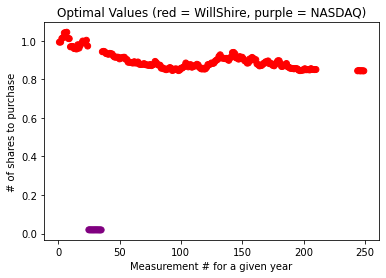

In [100]:
plt.scatter(optimal_vals2[:,0].astype('float64'),optimal_vals2[:,1].astype('float64'),c=optimal_vals2[:,3]);
plt.title('Optimal Values (red = WillShire, purple = NASDAQ)');
plt.xlabel('Measurement # for a given year');
plt.ylabel('# of shares to purchase');
plt.savefig('full_results2.png');

In [119]:
print(optimal_vals.shape)
print(optimal_vals[:,3][optimal_vals[:,3] == 'purple'].shape)
print(optimal_vals[:,3][optimal_vals[:,3] == 'red'].shape)

(217, 4)
(11,)
(206,)


In [121]:
print(optimal_vals2.shape)
print(optimal_vals2[:,3][optimal_vals2[:,3] == 'purple'].shape)
print(optimal_vals2[:,3][optimal_vals2[:,3] == 'red'].shape)

(216, 4)
(11,)
(205,)


In [128]:
optimal_vals2[100]

array(['18', '0.97599063', 'X_Will_18', 'red'], dtype='<U32')

Everything below is old code that was not used directly but I am a code horder.

In [132]:
# Checking to make sure the value is close to 100 for troubleshooting purposes
avg_willShire[17]*optimal_vals2[100,1].astype('float64')

99.99999994979999

In [69]:
# Finding the amount changed between entries
sp_500_diff = np.zeros(sp_500_data.shape[0])
dowJones_diff = np.zeros(sp_500_data.shape[0])
willShire_diff = np.zeros(sp_500_data.shape[0])
nasdaqcom_diff = np.zeros(sp_500_data.shape[0])

for i in range(1,sp_500_data.shape[0]):
    sp_500_diff[i] = sp_500_data[i][0] - sp_500_data[i-1][0]
    dowJones_diff[i] = dowJones_data[i][0] - dowJones_data[i-1][0]
    willShire_diff[i] = willShire_fullMarket_data[i][0] - willShire_fullMarket_data[i-1][0]
    nasdaqcom_diff[i] = nasdaqcom_data[i][0] - nasdaqcom_data[i-1][0]


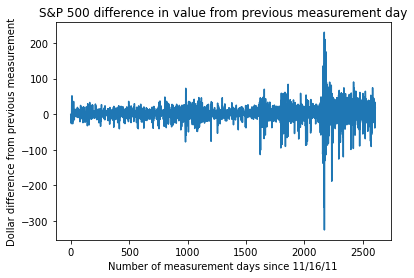

In [70]:
plt.figure;
plt.plot(sp_500_diff);
plt.title('S&P 500 difference in value from previous measurement day');
plt.xlabel('Number of measurement days since 11/16/11');
plt.ylabel('Dollar difference from previous measurement');

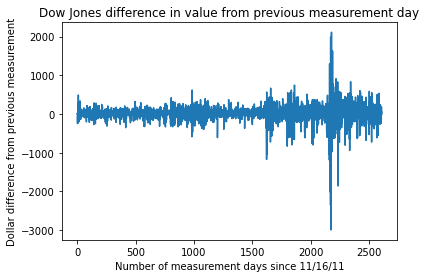

In [71]:
plt.figure;
plt.plot(dowJones_diff);
plt.title('Dow Jones difference in value from previous measurement day');
plt.xlabel('Number of measurement days since 11/16/11');
plt.ylabel('Dollar difference from previous measurement');

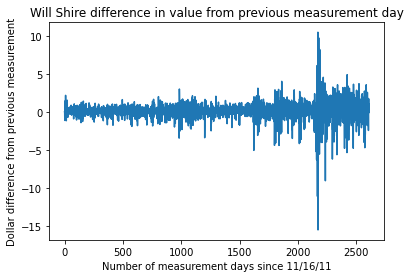

In [72]:
plt.figure;
plt.plot(willShire_diff);
plt.title('Will Shire difference in value from previous measurement day');
plt.xlabel('Number of measurement days since 11/16/11');
plt.ylabel('Dollar difference from previous measurement');

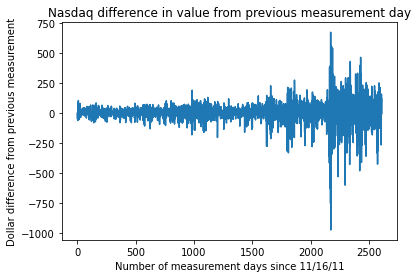

In [73]:
plt.figure;
plt.plot(nasdaqcom_diff);
plt.title('Nasdaq difference in value from previous measurement day');
plt.xlabel('Number of measurement days since 11/16/11');
plt.ylabel('Dollar difference from previous measurement');

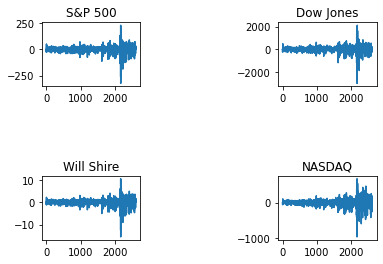

In [74]:
plt.subplot(3,3,1)
plt.plot(sp_500_diff);
plt.title('S&P 500');

plt.subplot(3,3,3)
plt.plot(dowJones_diff);
plt.title('Dow Jones')

plt.subplot(3,3,7)
plt.plot(willShire_diff);
plt.title('Will Shire')

plt.subplot(3,3,9)
plt.plot(nasdaqcom_diff);
plt.title('NASDAQ');

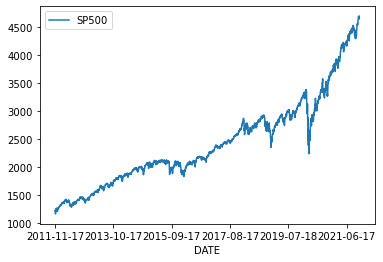

In [75]:
plt.figure;
original_sp_500_data.plot();

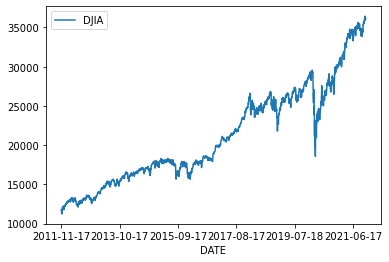

In [76]:
plt.figure;
original_dowJones_data.plot();

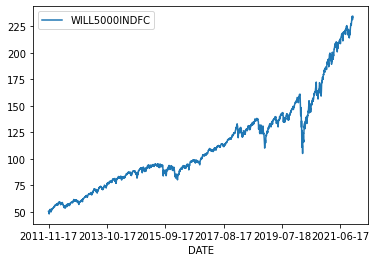

In [77]:
plt.figure;
original_willShire_fullMarket_data.plot();

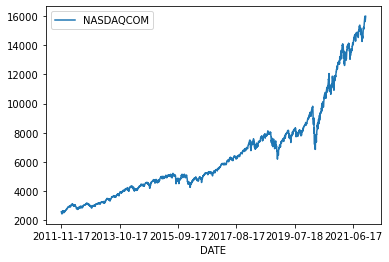

In [78]:
plt.figure;
original_nasdaqcom_data.plot();

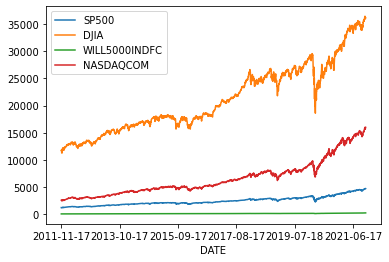

In [79]:
combined_info = pd.concat([original_sp_500_data,original_dowJones_data,original_willShire_fullMarket_data,original_nasdaqcom_data],axis=1)
plt.figure;
combined_info.plot();